<a href="https://colab.research.google.com/github/Desmondonam/NLP_1/blob/main/ML_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'll cover various ML algorithms, their use cases, implementation, evaluation, and visualization. We'll use small datasets to illustrate each concept.



In [4]:
# Setting up the envt
! pip install librosa pandas numpy matplotlib seaborn tensorflow pydub


2. Speech-to-Text Models
2.1. Dataset
For speech-to-text, we’ll use the LibriSpeech dataset, which is available for free. However, since it can be large, we’ll use a small subset or a similar small dataset.

2.2. Loading the Dataset
Let's start by loading and preprocessing a small audio dataset.

In [5]:
import librosa
import numpy as np

# Load an example audio file
audio_file = librosa.example('trumpet')
y, sr = librosa.load(audio_file, sr=16000)

# Display basic information about the audio
print(f"Audio Duration: {librosa.get_duration(y=y, sr=sr)} seconds")
print(f"Sample Rate: {sr}")


Audio Duration: 5.3334375 seconds
Sample Rate: 16000


2.3. Feature Extraction
For speech-to-text, we need to extract features from the audio, such as Mel-frequency cepstral coefficients (MFCCs).

MFCCs Shape: (13, 167)


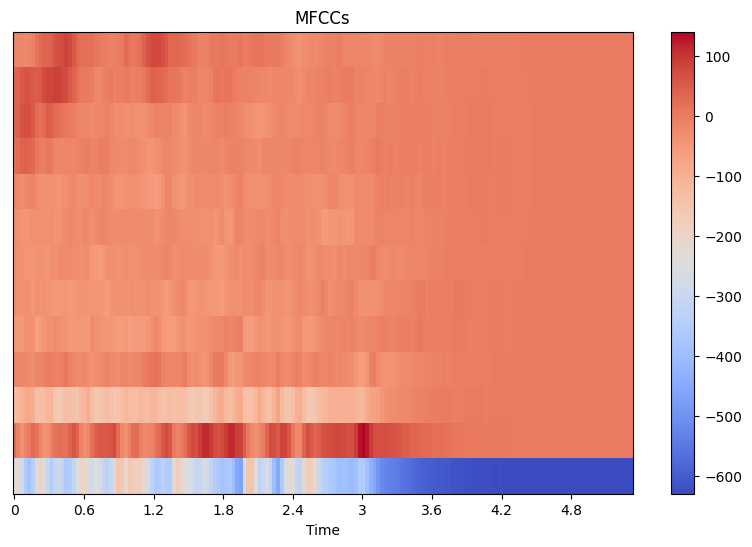

In [6]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display the shape of MFCCs
print(f"MFCCs Shape: {mfccs.shape}")

# Visualize MFCCs
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


2.4. Machine Learning Models
We’ll explore several ML models for speech-to-text tasks.

2.4.1. Support Vector Machine (SVM)
SVMs can be used for classifying small speech datasets.

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example: Assuming we have labeled data X (MFCCs) and y (transcriptions)
X_train, X_test, y_train, y_test = train_test_split(mfccs.T, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


ValueError: Found input variables with inconsistent numbers of samples: [167, 85335]

# 3. Text-to-Speech Models
3.1. Dataset
For text-to-speech, we’ll use a small text dataset, such as the LJSpeech dataset or similar.

3.2. Preprocessing Text Data

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data
texts = ["Hello, how are you?", "I am fine, thank you!"]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Pad the sequences
padded_sequences = pad_sequences(sequences, padding='post')

# Display tokenized text
print(padded_sequences)


[[2 3 4 1 0]
 [5 6 7 8 1]]


3.3. Building Text-to-Speech Models
3.3.1. Simple Neural Network
A simple neural network can be used for basic text-to-speech tasks.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128))
model.add(LSTM(128))
model.add(Dense(1, activation='linear'))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(padded_sequences, np.random.randn(len(padded_sequences), 1), epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.9563
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.9019
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.8475
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7917
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7331
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6706
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.6032
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5305
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.4523
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3690


4. Evaluation and Visualization
4.1. Evaluation Metrics
For speech-to-text:

Word Error Rate (WER): Measures the difference between predicted and actual transcriptions.
For text-to-speech:

Mean Opinion Score (MOS): Evaluates the quality of synthesized speech.
4.2. Visualizing Model Performance
Visualize the learning curves, confusion matrices, and more to understand model performance

In [10]:
# Example of visualizing a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


NameError: name 'y_test' is not defined